In [29]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('C:/Users/YTFYD/Desktop/Courses.csv')
data.head(10)

,index,course_id,userid_DI,final_cc_cname_DI,LoE_DI,gender,grade,nplay_video,nchapters,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,United States,NaN,NaN,0,NaN,NaN,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,United States,NaN,NaN,0,NaN,1.0,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,United States,NaN,NaN,0,NaN,NaN,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,United States,NaN,NaN,0,NaN,NaN,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,United States,NaN,NaN,0,NaN,NaN,0
5,5,HarvardX/PH207x/2012_Fall,MHxPC130275857,United States,NaN,NaN,0,50.0,12.0,0
6,6,HarvardX/PH278x/2013_Spring,MHxPC130275857,United States,NaN,NaN,0,NaN,NaN,0
7,7,HarvardX/CB22x/2013_Spring,MHxPC130539455,France,NaN,NaN,0,NaN,3.0,0
8,8,HarvardX/CB22x/2013_Spring,MHxPC130088379,United States,NaN,NaN,0,NaN,3.0,0
9,9,HarvardX/CS50x/2012,MHxPC130088379,United States,NaN,NaN,0,NaN,3.0,0


In [44]:
# Check data types
print(data.dtypes)

index                  int64
course_id             object
userid_DI             object
final_cc_cname_DI     object
LoE_DI                object
gender                object
grade                 object
nplay_video          float64
nchapters            float64
nforum_posts           int64
dtype: object
0


In [31]:
import numpy as np

# 2. 变量LoE_DI
# 使用该列的众数（出现次数最多的值）来填充缺失值
df_cleaned['LoE_DI'] = df_cleaned['LoE_DI'].fillna(df_cleaned['LoE_DI'].mode()[0])
# 随机填补性别
# 找出gender列中缺失值的索引，然后从gender列的非缺失值中随机选择值来填充这些缺失值
missing_indices = df_cleaned[data['gender'].isnull()].index
df_cleaned.loc[missing_indices, 'gender'] = np.random.choice(data['gender'].dropna(), len(missing_indices))

# 3. 删除grade列有缺失值的行
df_cleaned = df_cleaned.dropna(subset=['grade'])

# Print summary of the changes
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", df_cleaned.shape)
print("\nMissing values in cleaned dataset:")
print(df_cleaned.isnull().sum())

Original dataset shape: (641138, 10)
Cleaned dataset shape: (592766, 13)

Missing values in cleaned dataset:
index                     0
course_id                 0
userid_DI                 0
certified                 0
final_cc_cname_DI         0
LoE_DI                    0
gender                    0
grade                     0
nevents              188443
ndays_act            156092
nplay_video          424384
nchapters            236771
nforum_posts              0
dtype: int64


In [32]:
import pandas as pd

# 统计每个学生所选课程的数量
courses_per_student = df_cleaned.groupby('userid_DI').size()

average_courses = courses_per_student.mean()

#输出统计结果
print(f"Total number of unique students: {len(courses_per_student)}")
print(f"Average number of courses per student: {average_courses:.2f}")

# 查看学生选课数量的分布情况
print("\nDistribution of courses per student:")
print(courses_per_student.value_counts().sort_index())

Total number of unique students: 447584
Average number of courses per student: 1.32

Distribution of courses per student:
1     347987
2      70819
3      18994
4       6053
5       2293
6        755
7        307
8        114
9         88
10        52
11        37
12        26
13        12
14        16
15        16
16        15
dtype: int64


In [33]:
# 统计每个课程的选课人数
course_enrollment = df_cleaned['course_id'].value_counts()

print("Each subject's enrollment number:")
print(course_enrollment)

Each subject's enrollment number:
HarvardX/CS50x/2012            169621
MITx/6.00x/2012_Fall            66726
MITx/6.00x/2013_Spring          50762
HarvardX/ER22x/2013_Spring      49296
HarvardX/PH207x/2012_Fall       35683
MITx/6.002x/2012_Fall           33181
HarvardX/PH278x/2013_Spring     32860
MITx/8.02x/2013_Spring          29392
MITx/14.73x/2013_Spring         26572
HarvardX/CB22x/2013_Spring      24873
MITx/7.00x/2013_Spring          21002
MITx/6.002x/2013_Spring         17903
MITx/3.091x/2012_Fall           14212
MITx/8.MReV/2013_Summer          9477
MITx/2.01x/2013_Spring           5654
MITx/3.091x/2013_Spring          5552
Name: course_id, dtype: int64


Missing values in nchapters: 236771
Total rows: 592766
Missing percentage: 39.94341780736412 %


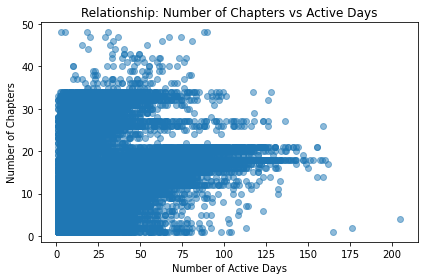


Correlation between ndays_act and nchapters:
0.7002579283879388

Average nchapters by certification status:
certified
0     3.008333
1    16.714310
Name: nchapters, dtype: float64

Certification rate for records with missing vs non-missing nchapters:
nchapters
False    0.049683
True     0.000000
Name: certified, dtype: float64

Average ndays_act for records with missing vs non-missing nchapters:
nchapters
False    8.032064
True     1.692753
Name: ndays_act, dtype: float64


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic information about missing values
print("Missing values in nchapters:", df_cleaned['nchapters'].isna().sum())
print("Total rows:", len(df_cleaned))
print("Missing percentage:", (df_cleaned['nchapters'].isna().sum() / len(df_cleaned)) * 100, "%")

# 2. Relationship between nchapters and certified
# First, let's look at non-missing values
# plt.figure(figsize=(12, 5))

# # Plot 1: Box plot of nchapters by certification status
# df = df_cleaned
# plt.subplot(1, 2, 1)
# sns.boxplot(x='certified', y='nchapters', data=df_cleaned[df_cleaned['nchapters'].notna()])
# plt.title('Distribution of Chapters by Certification Status\n(Non-missing values)')
# plt.xlabel('Certified (0=No, 1=Yes)')
# plt.ylabel('Number of Chapters')

# # Plot 2: Scatter plot of nchapters vs ndays_act
# plt.subplot(1, 2, 2)
plt.scatter(df['ndays_act'], df['nchapters'], alpha=0.5)
plt.title('Relationship: Number of Chapters vs Active Days')
plt.xlabel('Number of Active Days')
plt.ylabel('Number of Chapters')

plt.tight_layout()
plt.show()

# 3. Statistical Analysis
print("\nCorrelation between ndays_act and nchapters:")
print(df['ndays_act'].corr(df['nchapters']))

# 4. Average nchapters for certified vs non-certified students
print("\nAverage nchapters by certification status:")
print(df.groupby('certified')['nchapters'].mean())

# 5. Missing values analysis
print("\nCertification rate for records with missing vs non-missing nchapters:")
missing_cert = df.groupby(df['nchapters'].isna())['certified'].mean()
print(missing_cert)

print("\nAverage ndays_act for records with missing vs non-missing nchapters:")
missing_days = df.groupby(df['nchapters'].isna())['ndays_act'].mean()
print(missing_days)

In [39]:
import pandas as pd
import numpy as np
columns = ['nevents', 'ndays_act', 'nplay_video', 'nchapters']

for col in columns:
    # 计算该属性的均值和标准差
    mean_val = df_cleaned[col].mean()
    std_val = df_cleaned[col].std()

    # 找出该属性的空值索引
    null_indices = df_cleaned[col].isnull()

    # 生成满足正态分布的随机数
    random_values = np.random.normal(mean_val, std_val, null_indices.sum())

    # 确保随机数不为负数
    random_values = np.maximum(0, random_values)

    # 用生成的随机数填补空值
    df_cleaned.loc[null_indices, col] = random_values

In [40]:
print(df_cleaned.isnull().sum())

index                0
course_id            0
userid_DI            0
certified            0
final_cc_cname_DI    0
LoE_DI               0
gender               0
grade                0
nevents              0
ndays_act            0
nplay_video          0
nchapters            0
nforum_posts         0
dtype: int64


In [81]:
# 决策树我们来了！
import time
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 记录开始时间
start_time = time.time()

# 手动提取参与计算的属性
selected_features = ['final_cc_cname_DI', 'LoE_DI', 'gender', 'nevents',
                     'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']
X = df_cleaned[selected_features]
y = df_cleaned['grade']

# 对离散字符型特征进行数值化处理
categorical_features = ['final_cc_cname_DI', 'LoE_DI', 'gender']
for feature in categorical_features:
    encoder = LabelEncoder()
    X[feature] = encoder.fit_transform(X[feature])

# 初始化决策树分类器，后面计算可以发现最佳深度是10
decision_tree = DecisionTreeClassifier(random_state=42,max_depth=10)

# 进行十折交叉验证
cv_scores = cross_val_score(decision_tree, X, y, cv=10, scoring='accuracy')

# 记录结束时间
end_time = time.time()

# 计算运行时间
run_time = end_time - start_time


In [55]:
from sklearn.tree import export_graphviz

# 前面原有代码保持不变

# 生成决策树的可视化表示
# dot_data = export_graphviz(decision_tree, out_file=None, 
#                            feature_names=selected_features,  
#                            class_names=decision_tree.classes_.astype(str),  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)

# 下面开始提取最重要的路径
# 定义一个函数来提取路径
def extract_paths(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, path, paths):
        if (threshold[node] != -2):
            path = path + [features[node] + " <= " + str(threshold[node])]
            if left[node] != -1:
                recurse(left, right, threshold, features, left[node], path, paths)
            path = path[:-1]
            path = path + [features[node] + " > " + str(threshold[node])]
            if right[node] != -1:
                recurse(left, right, threshold, features, right[node], path, paths)
            path = path[:-1]
        else:
            class_index = np.argmax(value[node])
            class_name = decision_tree.classes_[class_index]
            path = path + ["class: " + str(class_name)]
            paths.append((path, node))  # 同时返回路径和节点索引
    paths = []
    recurse(left, right, threshold, features, 0, [], paths)
    return paths

# 提取所有路径和对应的节点索引
all_paths_with_nodes = extract_paths(decision_tree, selected_features)
all_paths = [path for path, _ in all_paths_with_nodes]
node_indices = [node for _, node in all_paths_with_nodes]

# 计算每个路径的样本数，以此作为重要性指标
path_importance = []
for node_index in node_indices:
    path_importance.append(decision_tree.tree_.n_node_samples[node_index])

# 根据重要性排序路径
sorted_paths = [path for _, path in sorted(zip(path_importance, all_paths), reverse=True)]

# 提取最重要的几条路径（这里假设提取前 3 条）
num_top_paths = 3
top_paths = sorted_paths[:num_top_paths]

print("最重要的几条决策路径:")
for i, path in enumerate(top_paths):
    print(f"路径 {i + 1}:")
    for condition in path:
        print(f"  {condition}")
    print()

最重要的几条决策路径:
路径 1:
  nevents <= 214.99073791503906
  nevents <= 76.98870849609375
  nevents <= 3.2351073026657104
  final_cc_cname_DI > 7.5
  final_cc_cname_DI <= 32.5
  class: 0

路径 2:
  nevents > 214.99073791503906
  nchapters > 2.9999247789382935
  ndays_act > 2.9994430541992188
  final_cc_cname_DI <= 32.5
  ndays_act <= 25.996806144714355
  class: 0

路径 3:
  nevents <= 214.99073791503906
  nevents <= 76.98870849609375
  nevents > 3.2351073026657104
  nplay_video <= 25.106216430664062
  nplay_video > 0.985275149345398
  class: 0



In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# 定义离散特征和连续特征
categorical_features = ['final_cc_cname_DI', 'LoE_DI', 'gender']
continuous_features = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']

# 构造 ColumnTransformer：对离散特征做独热编码，其余原样保留
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # 对其他列原样通过
)

# 构建流水线：先预处理，再接决策树分类器
pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])


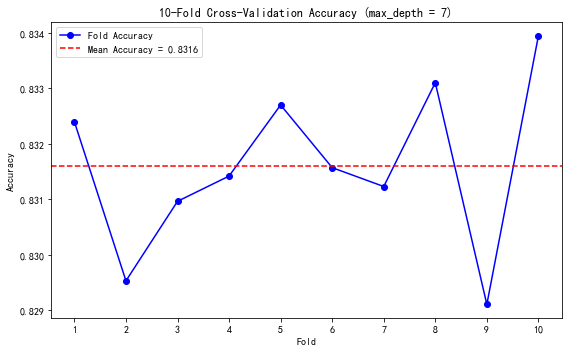

In [84]:
# 绘图：每一折的准确率折线图
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', color='blue', label='Fold Accuracy')
plt.axhline(np.mean(cv_scores), color='red', linestyle='--', label=f'Mean Accuracy = {np.mean(cv_scores):.4f}')
plt.xticks(range(1, 11))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('10-Fold Cross-Validation Accuracy (max_depth = 7)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [64]:
# 取出最佳模型（包含预处理和分类器）
best_model = grid.best_estimator_

# 获得决策树分类器部分
clf = best_model.named_steps['clf']

# 获取特征名称：首先构造完整的特征名列表
ohe = best_model.named_steps['pre'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = list(ohe_feature_names) + continuous_features

# 输出特征重要性（并按重要性排序）
import numpy as np
importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("特征重要性：")
print(importance_df.to_string(index=False))


特征重要性：
                                                 feature  importance
                                                 nevents    0.376677
                                               nchapters    0.265549
                                               ndays_act    0.187713
                         final_cc_cname_DI_Unknown/Other    0.090065
                                             nplay_video    0.065453
                         final_cc_cname_DI_United States    0.001476
                                                gender_m    0.001246
                                 final_cc_cname_DI_China    0.001229
                                            nforum_posts    0.001222
                                 final_cc_cname_DI_India    0.001112
                                        LoE_DI_Secondary    0.001011
                                                gender_f    0.000993
                                         LoE_DI_Master's    0.000890
                           

In [78]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# 特征选择
selected_features = ['final_cc_cname_DI', 'LoE_DI', 'gender',
                     'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']
X = df_cleaned[selected_features]
y = df_cleaned['grade']

# 特征类型划分
categorical_features = ['final_cc_cname_DI', 'LoE_DI', 'gender']
numerical_features = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']

# 保留数值原始值，保证可解释性
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# 决策树模型（控制复杂度）
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=42)

# 建立 pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

# 拟合模型
pipeline.fit(X, y)

# 获取特征名
encoded_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# 获取决策树本体
tree_model = pipeline.named_steps['classifier']
tree_ = tree_model.tree_

# 提取规则
def extract_decision_paths(tree_model, feature_names, max_paths=35, min_samples_leaf=50):
    tree_ = tree_model.tree_
    paths = []

    def recurse(node, path):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            feature_index = tree_.feature[node]
            feature = feature_names[feature_index]
            threshold = tree_.threshold[node]

            recurse(tree_.children_left[node], path + [f"{feature} <= {threshold:.3f}"])
            recurse(tree_.children_right[node], path + [f"{feature} > {threshold:.3f}"])
        else:
            samples = tree_.n_node_samples[node]
            impurity = tree_.impurity[node]
            predicted_class = tree_.value[node].argmax()
            if samples >= min_samples_leaf:
                paths.append({
                    "rule": path,
                    "samples": samples,
                    "class": predicted_class,
                    "impurity": impurity
                })

    recurse(0, [])
    paths = sorted(paths, key=lambda x: (x["impurity"], -x["samples"]))
    return paths[:max_paths]

# 输出 IF-THEN 规则
rules = extract_decision_paths(tree_model, encoded_feature_names)

for i, r in enumerate(rules):
    print(f"\n规则 {i+1}：")
    print("IF")
    for cond in r["rule"]:
        print(f"  {cond}")
    print(f"THEN grade = {r['class']}  (samples = {r['samples']}, impurity = {r['impurity']:.3f})")



规则 1：
IF
  num__nevents <= 214.991
  num__nevents <= 76.989
  num__nevents > 3.235
  num__nplay_video <= 25.106
  num__nplay_video > 0.985
THEN grade = 1  (samples = 57704, impurity = 0.070)

规则 2：
IF
  num__nevents <= 214.991
  num__nevents <= 76.989
  num__nevents <= 3.235
  cat__final_cc_cname_DI_United States > 0.500
  cat__gender_o <= 0.500
THEN grade = 1  (samples = 50699, impurity = 0.082)

规则 3：
IF
  num__nevents > 214.991
  num__nchapters <= 3.000
  num__nevents > 724.004
  num__nforum_posts <= 0.500
  cat__final_cc_cname_DI_Unknown/Other > 0.500
THEN grade = 1  (samples = 20262, impurity = 0.085)

规则 4：
IF
  num__nevents > 214.991
  num__nchapters <= 3.000
  num__nevents <= 724.004
  num__nchapters <= 2.000
  cat__final_cc_cname_DI_Unknown/Other > 0.500
THEN grade = 1  (samples = 4591, impurity = 0.095)

规则 5：
IF
  num__nevents <= 214.991
  num__nevents > 76.989
  num__ndays_act > 24.995
  num__nchapters <= 8.978
  cat__final_cc_cname_DI_India <= 0.500
THEN grade = 1  (sampl

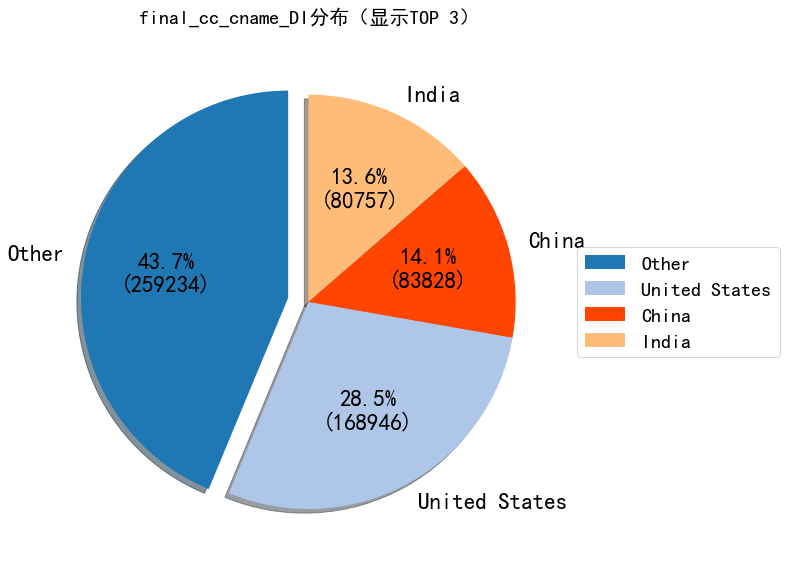

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def generate_pie_chart(df, category_col, top_n=3):
    """生成饼图（严格仅重命名不合并）"""
    # 深拷贝原始数据避免污染
    temp_df = df.copy()
    temp_df[category_col] = temp_df[category_col].replace(
        {'Unknown/Other': 'China'}
    )
    
    # 计算分布
    value_counts = temp_df[category_col].value_counts()
    
    # 合并小类别逻辑
    if len(value_counts) > top_n:
        top_categories = value_counts.nlargest(top_n).index
        modified_series = temp_df[category_col].where(
            temp_df[category_col].isin(top_categories),
            other='Other'
        )
        merged_counts = modified_series.value_counts()
    else:
        merged_counts = value_counts
    
    # 可视化参数
    n = len(merged_counts)
    explode = np.zeros(n)
    max_idx = merged_counts.argmax()
    explode[max_idx] = 0.1
    
    colors = list(plt.cm.tab20.colors[:min(n, 20)])
    if 'China' in merged_counts.index:
        china_idx = merged_counts.index.get_loc('China')
        colors[china_idx] = '#FF4500'  # 使用橙红色
    
    # 绘制饼图
    plt.figure(figsize=(12, 8))
    wedges, texts, autotexts = plt.pie(
        merged_counts,
        labels=merged_counts.index,
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*merged_counts.sum())})',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 23}
    )
    
    # 添加标题和图例
    plt.title(f'{category_col}分布（显示TOP {top_n}）', fontsize=20, pad=20)
    plt.legend(
        wedges,
        merged_counts.index,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=20
    )
    
    plt.tight_layout()
    plt.show()

# 使用示例
generate_pie_chart(df, category_col='final_cc_cname_DI', top_n=3)